I will continue explaining the process I went through for analyzing airbnb data. This time I'm using TextBlob for sentiment analysis and Azure Cognitive Services for image recognition.

## Image Recognition 

First, I started configuring an azure cognitive services API. From it I got a subscription key and an endpoint to connect. More can be found in [azure-doc](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts/python-analyze).

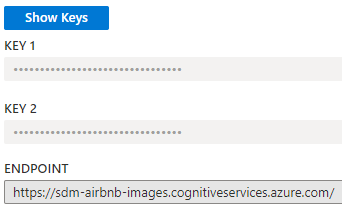

In [5]:
import requests
import pandas as pd
import json


#subscription key and endpoint
subscription_key = ''
endpoint = 'https://sdm-airbnb-images.cognitiveservices.azure.com/'
analyze_url = endpoint + "vision/v2.1/analyze"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}

In [ ]:
# This part of the code is just for testing and understanding 
# of the response from the Azure API.

data = {'url': 'https://a0.muscache.com/im/pictures/67002727-38d2-4be7-aa2d-3beabc29df91.jpg?aki_policy=large'}

response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

image_description = analysis["description"]["captions"][0]["text"]
image_dominantfgColor = analysis["color"]["dominantColorForeground"]
image_dominantbgColor = analysis["color"]["dominantColorBackground"]

print(image_description)
print(image_dominantfgColor)
print(image_dominantbgColor)

### Azure ComputerVisio API Response and storage
Now that I have a better understanding of what I can find in each response from the API I can collect and append this data to my **airbnb_listing.csv** dataset.

Azure Computer Vision can extract information from any image and retrieves, identifying colors, objects, words, faces and more!

See [here](https://azure.microsoft.com/en-us/services/cognitive-services/computer-vision/#features) a few examples of how powerful this tool can be. In this case I'm using it for something very simple.

In [70]:
image_desc = []
image_fgColor = []
image_bgColor = []

# Looping in airbnb_listing.csv 

for image_url in airbnb_df['picture_url']:
    # Set image_url to the URL of an image that you want to analyze.    
    data = {'url': image_url}
    
    response = requests.post(analyze_url, headers=headers, params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
    #print(json.dumps(response.json()))
    
    try:
        image_desc.append(analysis["description"]["captions"][0]["text"])
        image_fgColor.append(analysis["color"]["dominantColorForeground"])
        image_bgColor.append(analysis["color"]["dominantColorBackground"])
    except:
        print('Error image_url: ' +image_url)
        continue

Error image_url: https://a0.muscache.com/im/pictures/aac2258d-f866-466b-92ac-4acbc5399391.jpg?aki_policy=large


In [73]:
airbnb_df['image_description'] = image_desc
airbnb_df['image_dominantfgColor'] = image_fgColor
airbnb_df['image_dominantbgColor'] = image_bgColor
airbnb_df.head(5)
# len(image_desc)

551

In [67]:
airbnb_df.to_csv ('airbnb_listing_imagereco.csv', index = None, header=True)

At this point the image recognition process is now complete. It is time to proceed with the sentiment analysis part.

With this we are all set to start the analysis! 